### **Formatting the CSV**


In [4]:
import pandas as pd

file = "QueryResults.csv"
df = pd.read_csv(file, names=["DATE", "LANGUAGE", "POSTS"], header=0)

In [5]:
df.head()

,DATE,LANGUAGE,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [6]:
df.tail()

,DATE,LANGUAGE,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


### **Formmating the DATE Column**


In [7]:
type(df.DATE[0])

df.DATE = pd.to_datetime(df.DATE)
df

,DATE,LANGUAGE,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


### **Formmating the Cells using the pivot**


In [8]:
formatted_df = df.pivot(index="DATE", columns="LANGUAGE", values="POSTS")
formatted_df.fillna(0, inplace=True)  # Replacing NaN with "0"
formatted_df.isna().values.all()
formatted_df.head()

LANGUAGE,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [9]:
formatted_df.shape

(145, 14)

In [10]:
formatted_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=145, freq=None)

In [11]:
formatted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='LANGUAGE')

In [12]:
formatted_df.count().head()

LANGUAGE
assembly    145
c           145
c#          145
c++         145
delphi      145
dtype: int64

### _Visulize Popularity of C++_


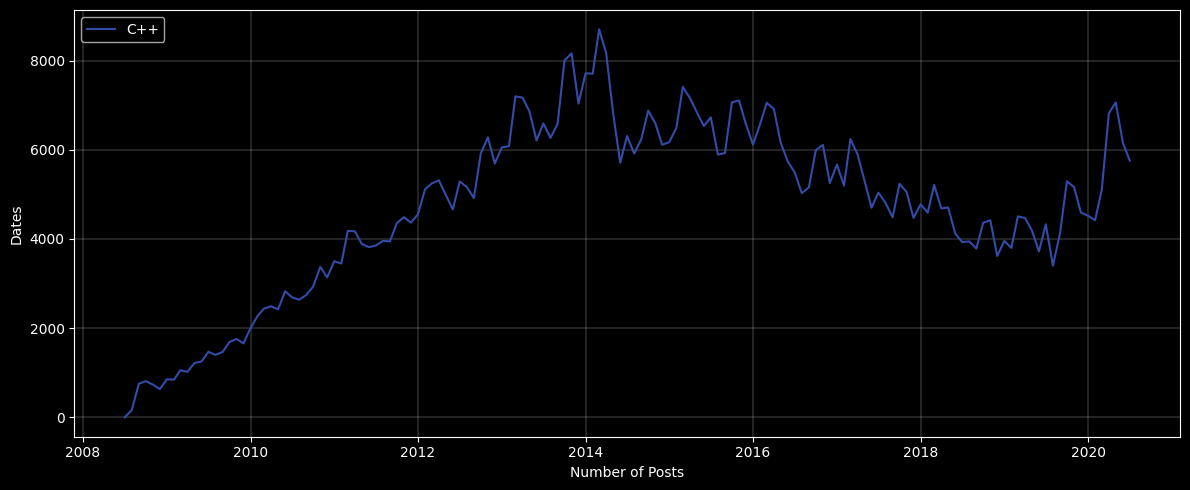

In [35]:
import matplotlib.pyplot as plt

cpp_x_cor: any = formatted_df.index
cpp_y_cor: any = formatted_df["c++"]

cpp_x_label: str = "Number of Posts"
cpp_y_label: str = "Dates"
plot_title: str = "Popularity of C++"

plt.figure(figsize=(12, 5))
plt.grid(visible=True, which="both", linewidth=0.2)
plt.xlabel(cpp_x_label)
plt.ylabel(cpp_y_label)

plt.plot(cpp_x_cor, cpp_y_cor, color="#324ca8", label="C++")

plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

### Popularity of Python


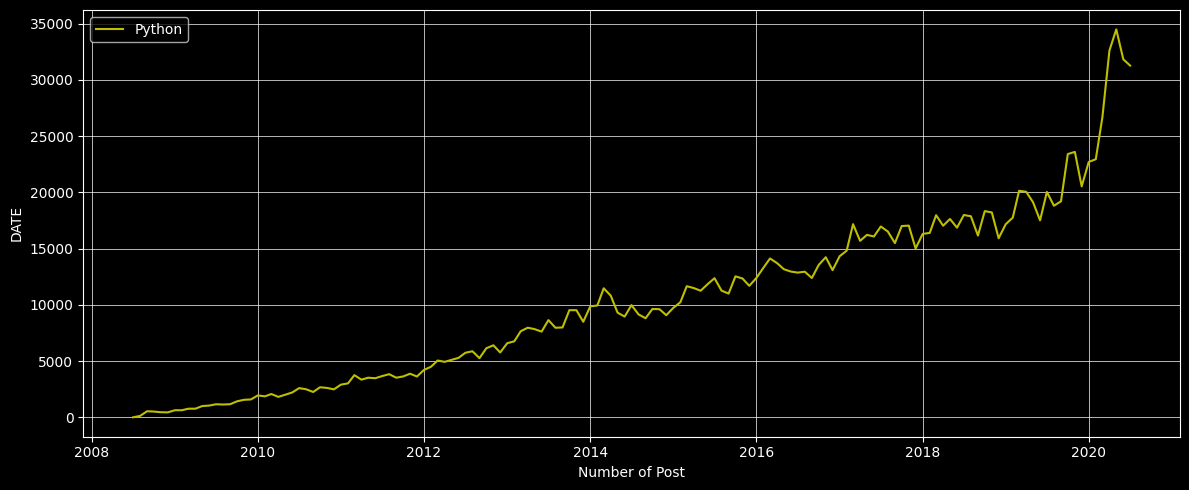

In [46]:
py_x_cor = formatted_df.index
py_y_cor = formatted_df["python"]

py_x_label = "Number of Post"
py_y_label = "DATE"

plt.figure(figsize=(12, 5))

plt.plot(py_x_cor, py_y_cor, color="y", label="Python")
plt.grid(visible=True, which="both", linewidth=0.5)
plt.xlabel(py_x_label)
plt.ylabel(py_y_label)


plt.legend(loc="upper left")


plt.tight_layout()
plt.show()

### Plot Any Language Popularity Graph


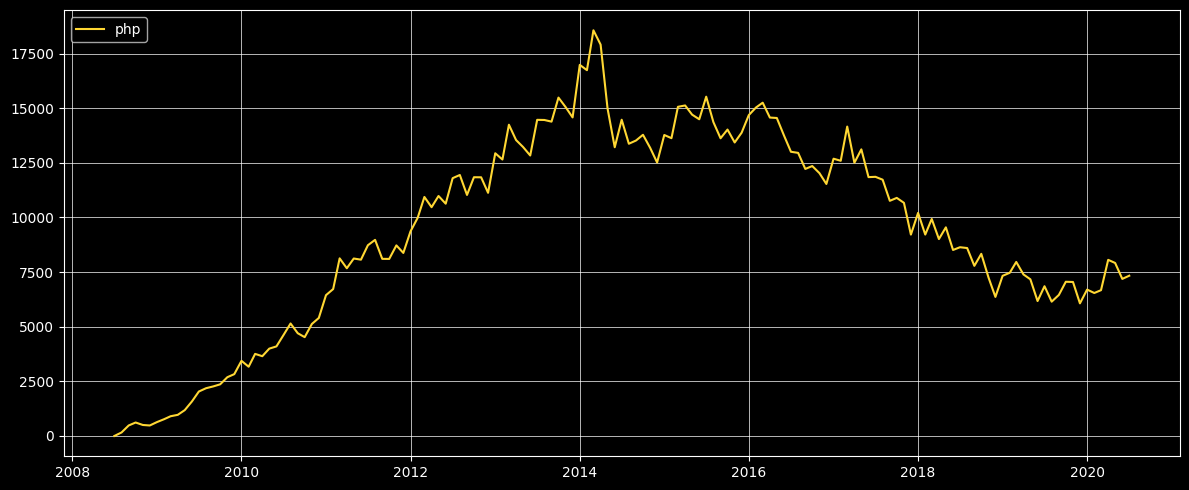

In [68]:
import random

user_input_language = input("Enter the Language: ").lower()

colors = [
    "#FF5733",
    "#33FF57",
    "#3357FF",
    "#FF33A1",
    "#A133FF",
    "#FF8C33",
    "#33FFD7",
    "#FFD733",
    "#A1FF33",
    "#33A1FF",
]

for _ in range(len(colors)):
    random_color = random.choice(colors)


any_graph_xcor = formatted_df.index
any_graph_ycor = formatted_df[f"{user_input_language}"]


plt.figure(figsize=(12, 5))
plt.grid(visible=True, which="both", linewidth=0.5)

plt.plot(any_graph_xcor, any_graph_ycor, label=user_input_language, color=random_color)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()